In [1]:
# Some jupyter notebook magic to reload modules automaticaally when they change
# not neccessary for this specific notebook but useful in general
%load_ext autoreload
%autoreload 2

# Gives you high resolution images within the notebook
%config InlineBackend.figure_format = 'retina'

In [2]:
from pypsdm.ma_thesis import *
from pypsdm.ma_thesis.utils import get_output_path


grid_name = "semiurb-combined-1"
result_folder_name = "Simulationen"
result_base_name = "Szenario"
szenarios = [1,2,3,4]
result_suffix = "part"

upper_limit = 1.05
lower_limit = 0.95

dotted = [lower_limit, upper_limit]

def res_out(scenario:str, filename: str, extension: str = "pdf"):
    return get_output_path(result_base_name+"-"+scenario+"-"+result_suffix, filename+"."+extension)


In [3]:
# Read grid and results

grid, results = read_scenarios(grid_name, result_folder_name, result_base_name, szenarios, result_suffix)



2024-07-06 16:17:48.045 | DEBUG    | pypsdm.models.primary_data:from_csv:266 - No primary data in path C:\Users\mariu\PycharmProjects\pypsdm\input\ma_thesis\grids\semiurb-combined-1


In [ ]:
# Informationen
from pypsdm.ma_thesis.subgrid import SubGrid

subgrids = SubGrid.build(grid)

transformer_uuids: dict[str, list[str]] = {
    "1-2": get_transformers_between(subgrids[1], subgrids[2]),
    "2-3": get_transformers_between(subgrids[2], subgrids[3]),
    "2-4": get_transformers_between(subgrids[2], subgrids[4]),
    "2-5": get_transformers_between(subgrids[2], subgrids[5]),
}


In [ ]:
# Erkennung

detection_scenario = "1"

detection_results = results[result_base_name+"-"+detection_scenario+"-"+result_suffix]

detection_subgrid_info = {nr: SubGridInfo(sub, detection_results) for nr, sub in subgrids.items()}

#_ = plot_voltage_with_congestion(detection_subgrid_info[1], detection_results, dotted=dotted).savefig(res_out(detection_scenario, "Voltage_congestion-1"))
#_ = plot_voltage_with_congestion(detection_subgrid_info[2], detection_results, dotted=dotted).savefig(res_out(detection_scenario, "Voltage_congestion-2"))
#_ = plot_voltage_with_congestion(detection_subgrid_info[3], detection_results, dotted=dotted).savefig(res_out(detection_scenario, "Voltage_congestion-3"))
#_ = plot_voltage_with_congestion(detection_subgrid_info[4], detection_results, dotted=dotted).savefig(res_out(detection_scenario, "Voltage_congestion-4"))
#_ = plot_voltage_with_congestion(detection_subgrid_info[5], detection_results, dotted=dotted).savefig(res_out(detection_scenario, "Voltage_congestion-5"))


#_ = plot_line_utilization_with_congestion(detection_subgrid_info[2], detection_results).savefig(res_out(detection_scenario, "Line_congestion-2"))
#_ = plot_line_utilization_with_congestion(detection_subgrid_info[3], detection_results).savefig(res_out(detection_scenario, "Line_congestion-3"))
#_ = plot_line_utilization_with_congestion(detection_subgrid_info[4], detection_results).savefig(res_out(detection_scenario, "Line_congestion-4"))
#_ = plot_line_utilization_with_congestion(detection_subgrid_info[5], detection_results).savefig(res_out(detection_scenario, "Line_congestion-5"))

#detection_gwr = GridWithResults(grid, detection_results)
#_ = plot_transformer_utilization_with_congestion(detection_subgrid_info[2], transformer_uuids["1-2"], detection_gwr).savefig(res_out(detection_scenario, "Transformer_congestions-12"))
#_ = plot_transformer_utilization_with_congestion(detection_subgrid_info[3], transformer_uuids["2-3"], detection_gwr).savefig(res_out(detection_scenario, "Transformer_congestions-23"))
#_ = plot_transformer_utilization_with_congestion(detection_subgrid_info[4], transformer_uuids["2-4"], detection_gwr).savefig(res_out(detection_scenario, "Transformer_congestions-24"))
#_ = plot_transformer_utilization_with_congestion(detection_subgrid_info[5], transformer_uuids["2-5"], detection_gwr).savefig(res_out(detection_scenario, "Transformer_congestions-25"))



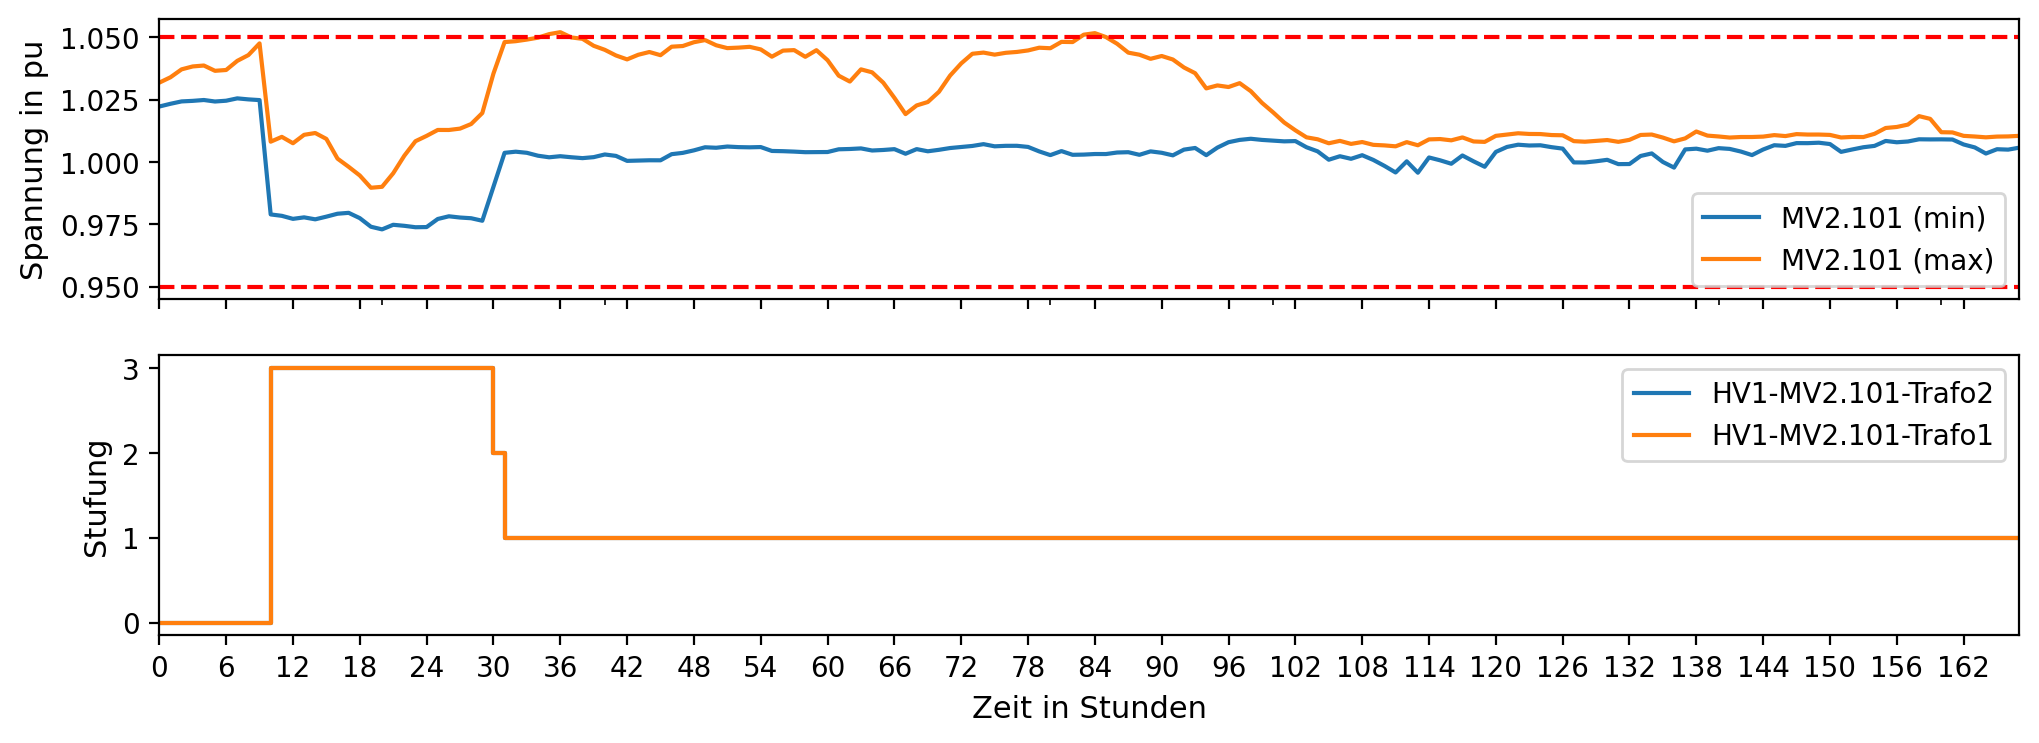

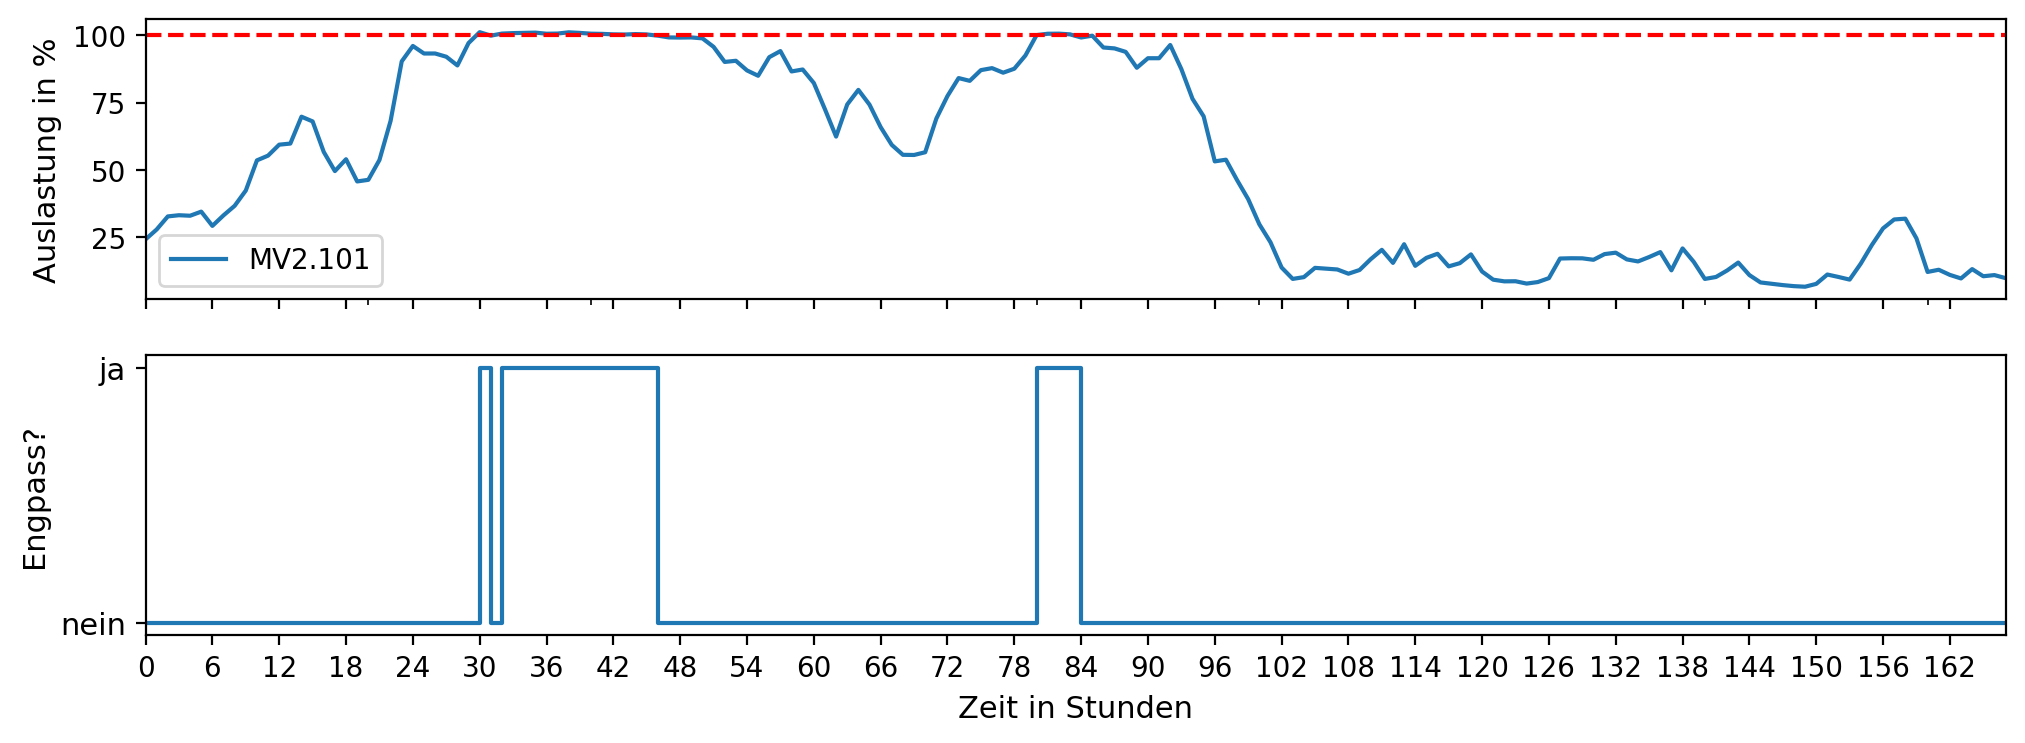

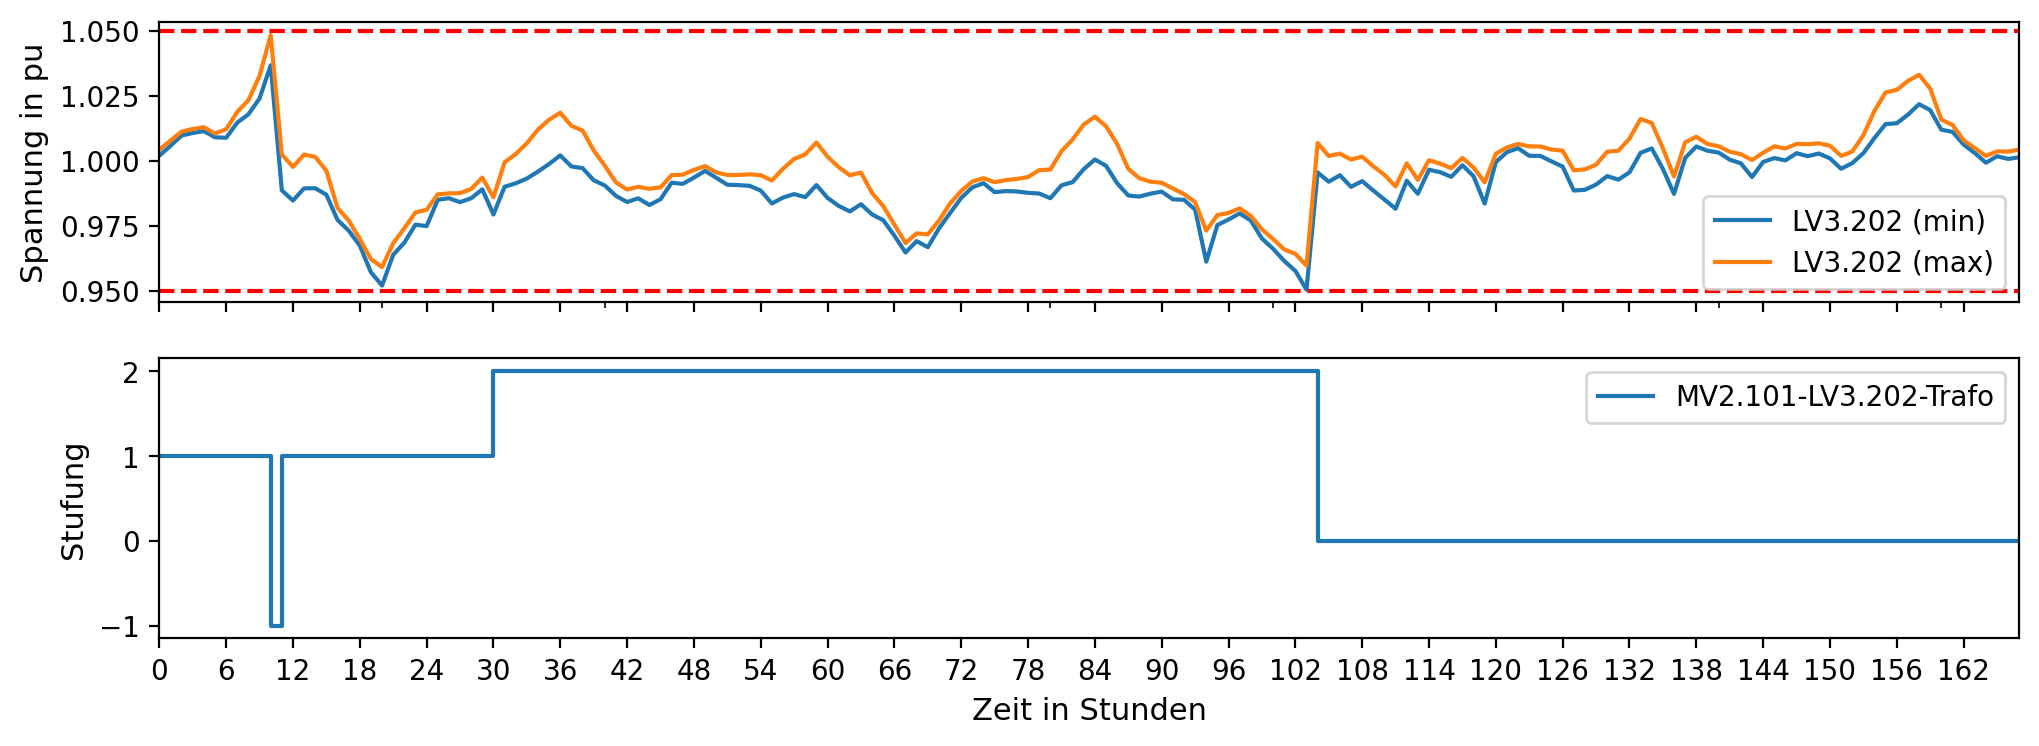

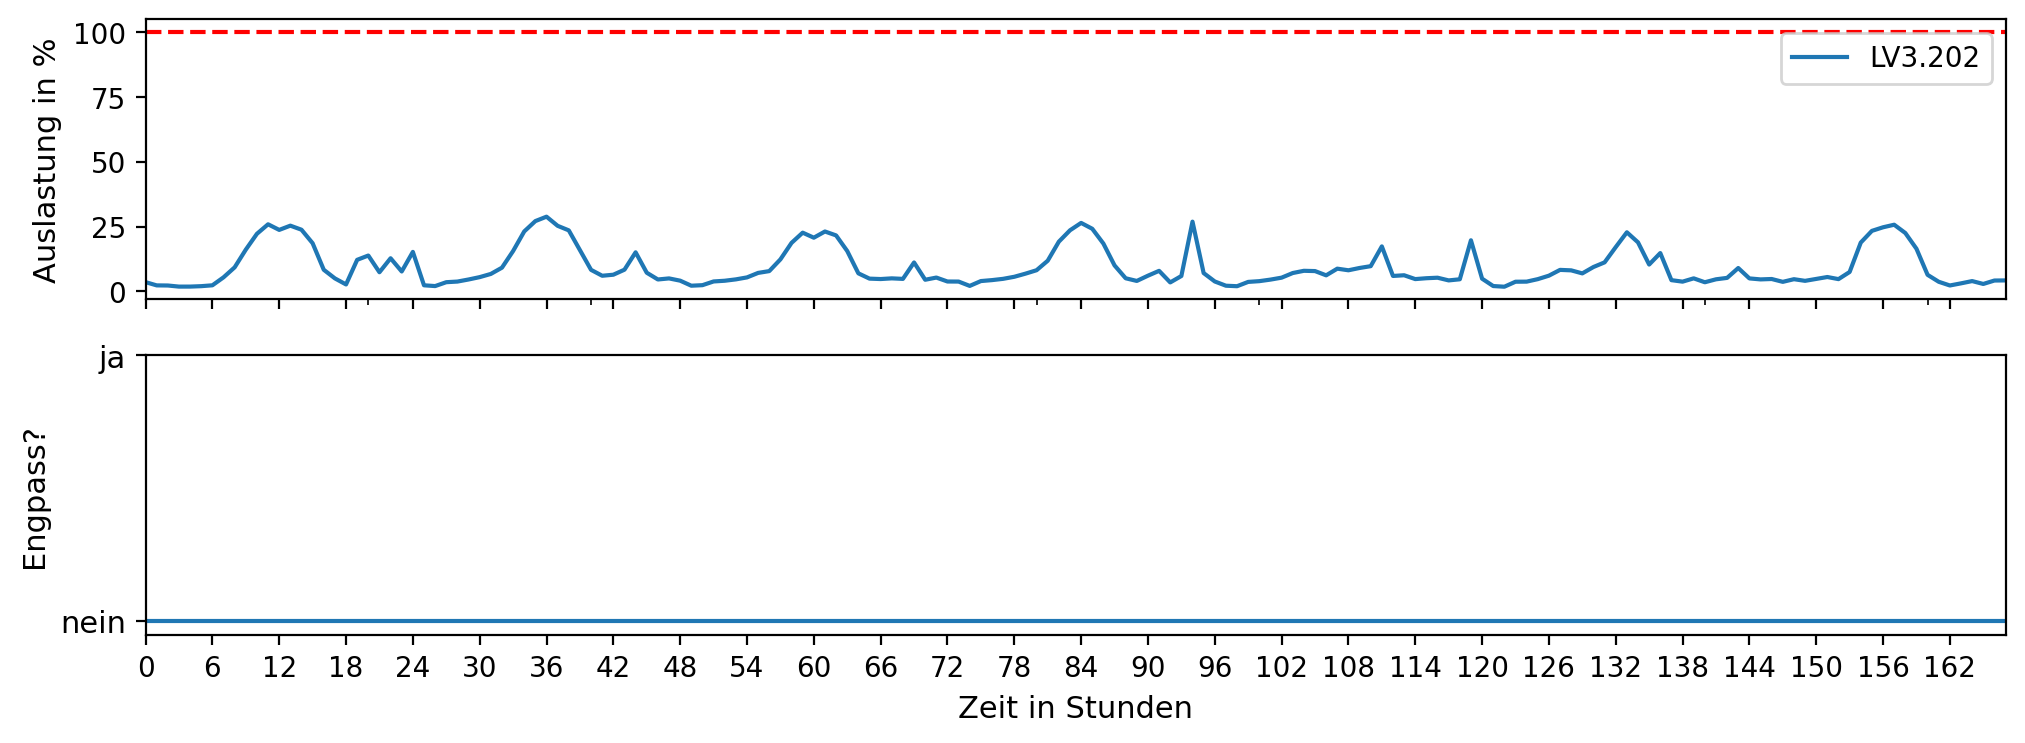

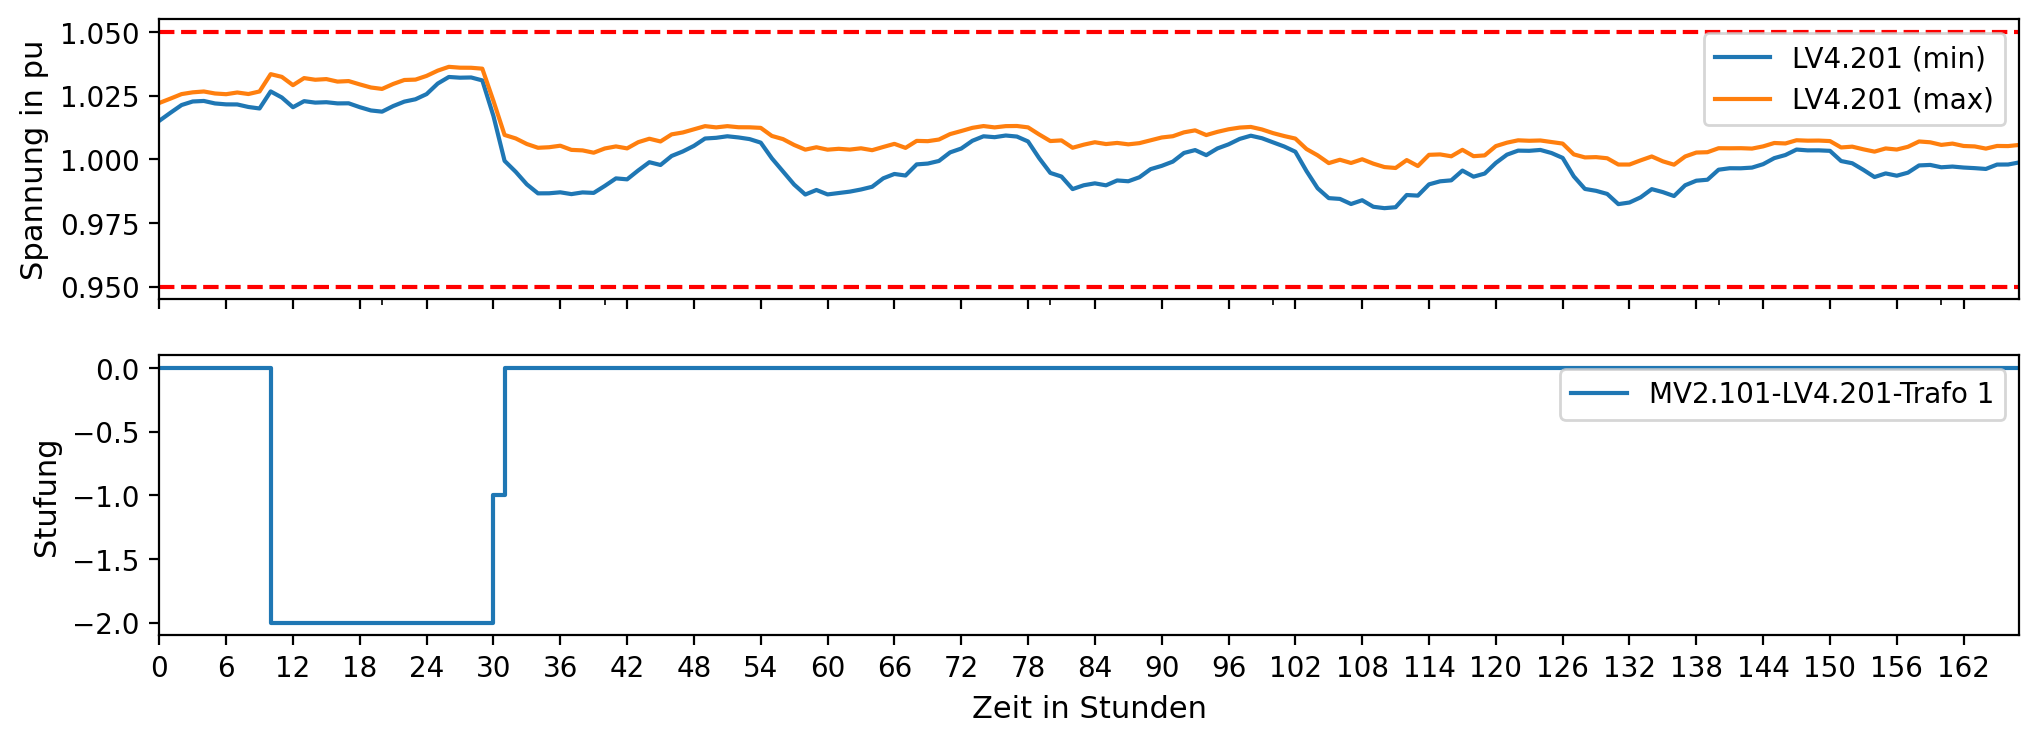

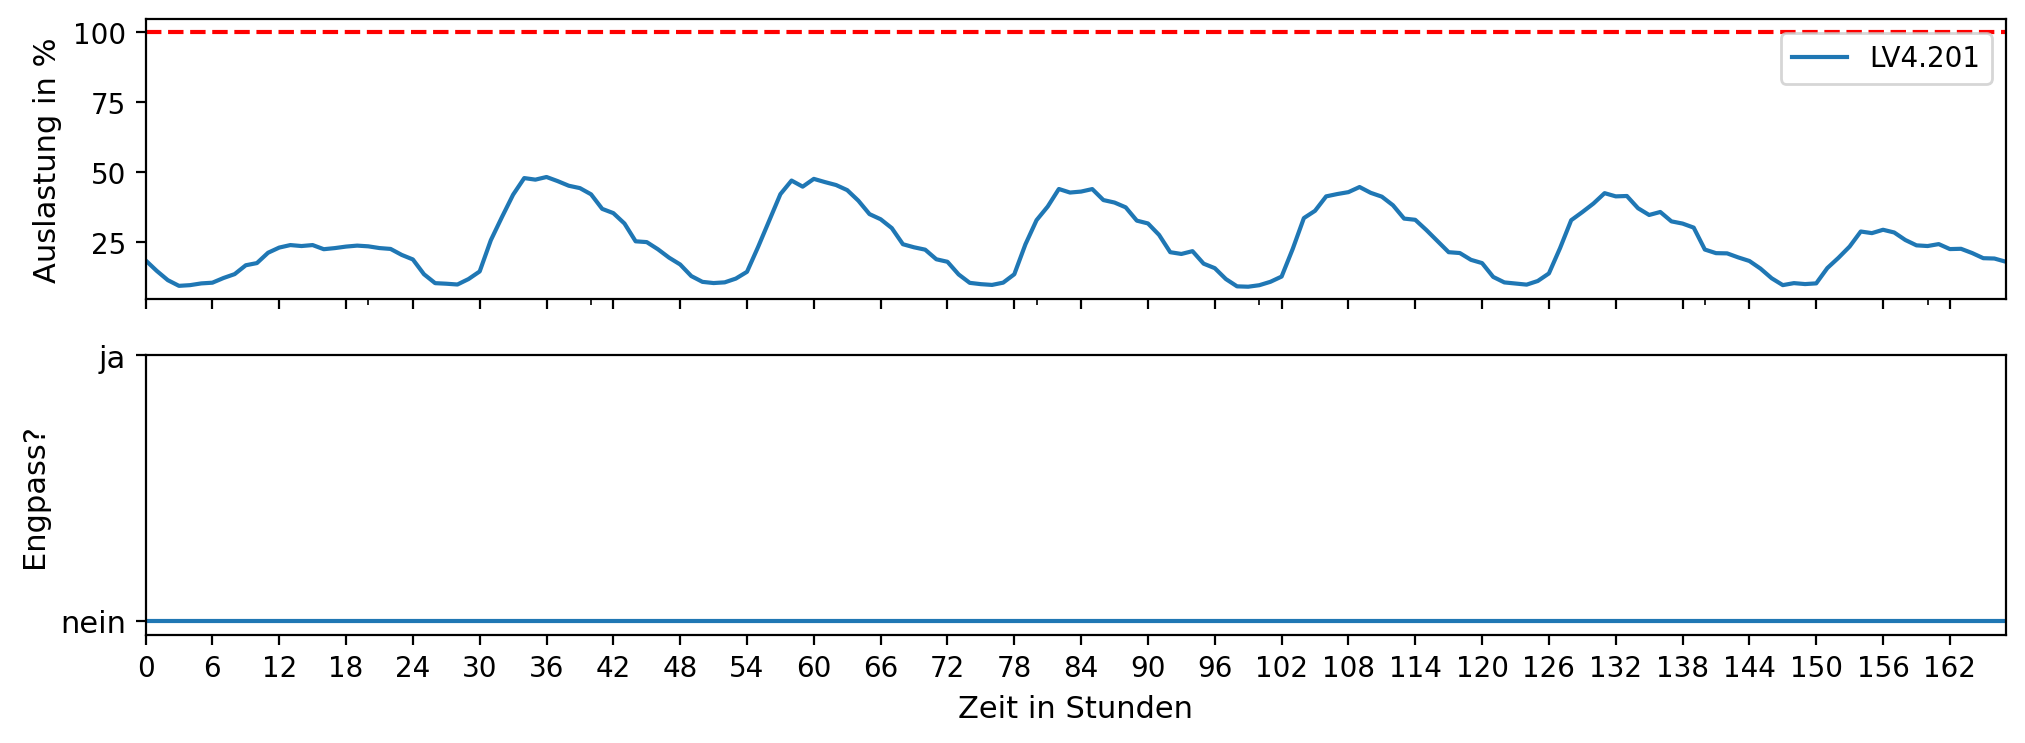

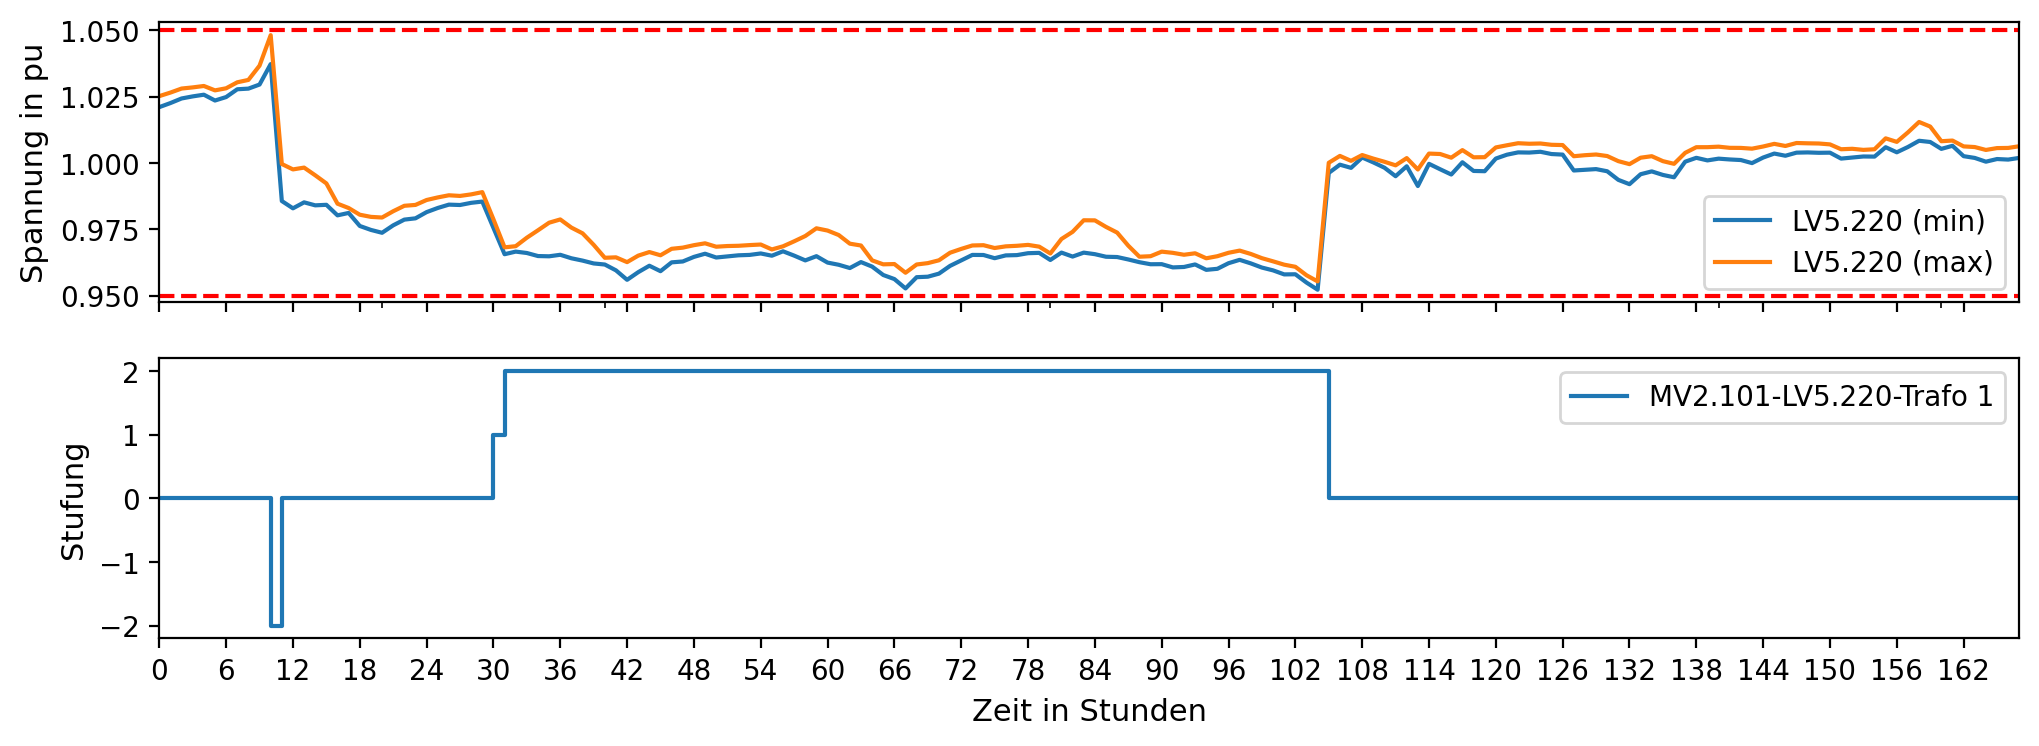

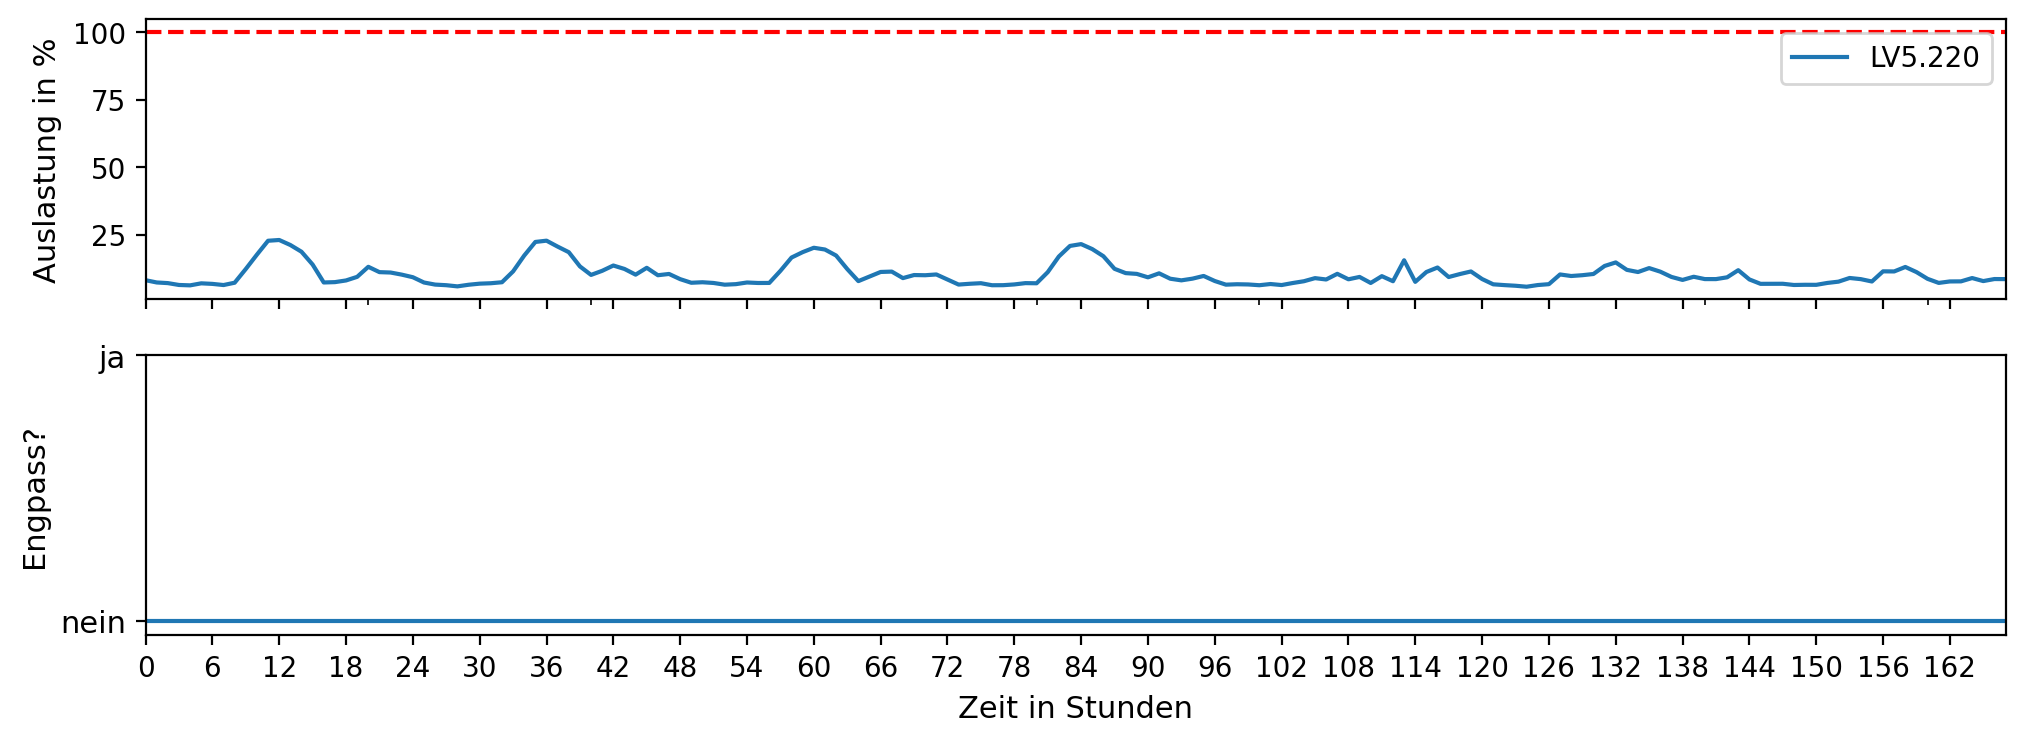

In [ ]:
# Stufung

tapping_scenario = "2"
tapping_results = results[result_base_name+"-"+tapping_scenario+"-"+result_suffix]

#_ = plot_voltage_with_tapping(subgrids[2], transformer_uuids["1-2"], tapping_results, dotted).savefig(res_out(tapping_scenario, "Stufung12"))
#_ = plot_line_utilization_with_congestion(SubGridInfo(subgrids[2], tapping_results), tapping_results).savefig(res_out(tapping_scenario, "Line_congestion-2"))

#_ = plot_voltage_with_tapping(subgrids[3], transformer_uuids["2-3"], tapping_results, dotted).savefig(res_out(tapping_scenario, "Stufung23"))
#_ = plot_line_utilization_with_congestion(SubGridInfo(subgrids[3], tapping_results), tapping_results).savefig(res_out(tapping_scenario, "Line_congestion-3"))

#_ = plot_voltage_with_tapping(subgrids[4], transformer_uuids["2-4"], tapping_results, dotted).savefig(res_out(tapping_scenario, "Stufung24"))
#_ = plot_line_utilization_with_congestion(SubGridInfo(subgrids[4], tapping_results), tapping_results).savefig(res_out(tapping_scenario, "Line_congestion-4"))

#_ = plot_voltage_with_tapping(subgrids[5], transformer_uuids["2-5"], tapping_results, dotted).savefig(res_out(tapping_scenario, "Stufung25"))
#_ = plot_line_utilization_with_congestion(SubGridInfo(subgrids[5], tapping_results), tapping_results).savefig(res_out(tapping_scenario, "Line_congestion-5"))


In [ ]:
info = SubGridInfo(subgrids[2], results[result_base_name+"-"+tapping_scenario+"-"+result_suffix])

info.line_max.loc["2016-07-25 23:00:00"]


MV2.101    0.655635
Name: 2016-07-25 23:00:00, dtype: float64

In [ ]:
# Spannungsvergleich
from pypsdm.ma_thesis.plots import plot_voltages_with_scenario


#_ = plot_voltages_with_scenario(subgrids[2], results, upper_limit=upper_limit, lower_limit=lower_limit).savefig(res_out("Spannung-2-all"))
#_ = plot_voltages_with_scenario(subgrids[3], results, upper_limit=upper_limit, lower_limit=lower_limit).savefig(res_out("Spannung-3-all"))
#_ = plot_voltages_with_scenario(subgrids[4], results, upper_limit=upper_limit, lower_limit=lower_limit).savefig(res_out("Spannung-4-all"))
#_ = plot_voltages_with_scenario(subgrids[5], results, upper_limit=upper_limit, lower_limit=lower_limit).savefig(res_out("Spannung-5-all"))




In [ ]:


# _ = plot_with_highlights(gwr.grid)
# _ = plot_voltage_subgrids(subgrids, dotted=[1.03, 0.97], width=30, height=20)
# _ = plot_voltage_with_tapping(subgrids[1], subgrids[2], gwr.transformers_2_w, gwr.transformers_2_w_res, width=30, height=10, dotted=[1.03, 0.97])
# _ = plot_line_utilizations(subgrids[4], threshold=0.33, show_legend=False, width=30)
# _ = plot_line_utilizations(subgrids[2], threshold=0.33, show_legend=False, width=30)